In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
X = torch.linspace(-1, 1, 100).unsqueeze(-1)
y = 2*X**2 - 0.5*X + 1
y = (y - y.min()) / (y.max() - y.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )

    def forward(self, x):
        return self.layers(x)

In [4]:
def train(model, criterion, optimizer, epochs=200):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    return train_losses

In [5]:
def evaluate(model):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = nn.MSELoss()(predictions, y_test)
    return loss.item()

In [6]:
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.1),
    "Momentum": lambda params: optim.SGD(params, lr=0.1, momentum=0.9),
    "Adam": lambda params: optim.Adam(params, lr=0.1),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.1),
    "Adagrad": lambda params: optim.Adagrad(params, lr=0.1)
}


In [7]:
results = {}

for name, optimizer_fn in optimizers.items():
    print(f"Training with {name} optimizer")
    model = SimpleNN()
    optimizer = optimizer_fn(model.parameters())
    criterion = nn.MSELoss()

    train_losses = train(model, criterion, optimizer)
    test_loss = evaluate(model)

    results[name] = {
        "train_losses": train_losses,
        "test_loss": test_loss
    }

    print(f"Test Loss ({name}): {test_loss:.4f}\n")

Training with SGD optimizer
Test Loss (SGD): 0.0042

Training with Momentum optimizer
Test Loss (Momentum): 0.0001

Training with Adam optimizer
Test Loss (Adam): 0.0003

Training with RMSprop optimizer
Test Loss (RMSprop): 0.0023

Training with Adagrad optimizer
Test Loss (Adagrad): 0.0002



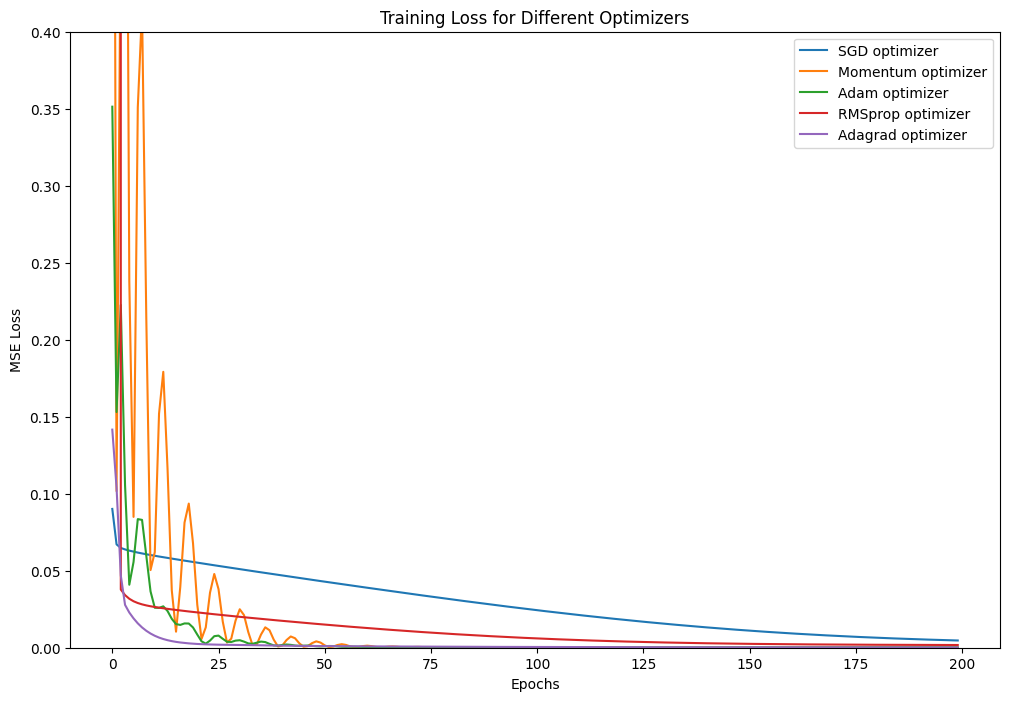

In [8]:
plt.figure(figsize=(12, 8))
for name, result in results.items():
    plt.plot(result["train_losses"], label=f"{name} optimizer")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.ylim(0, 0.4)
plt.title("Training Loss for Different Optimizers")
plt.legend()
plt.show()